[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[(1, 2), (1, 4), (2, 3), (3, 4)]


RuntimeError: Requested MovieWriter (ffmpeg) not available

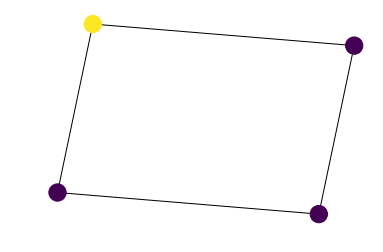

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
plt.rcParams["animation.html"] = "html5"
# number of nodes
size = 10

# generate graph
df = pd.DataFrame({ 'from':[1,2,3,4], 'to':[2,3,4,1]})
df

G=nx.from_pandas_edgelist(df,'from','to')

# generating input frames here, since my data is too big
# its important that the frames go as input and is not generated
# on the fly'
def DFS(G, start, size):
    order = []
    nodes = G.nodes()
    edges = G.edges()
    toExplore = [start]
    visited = [0]*size
    while len(toExplore) > 0:
        i = toExplore.pop(0)
        visited[i] = 1
        order.append(i)
        for j in edges:
            if i == j[0]:
                if visited[j[1]] == 0:
                    toExplore.append(j[1])
    #for each layer (numLayers = numNodes)
    return order

# random ndarray between 0 and 5, length and number of frames = number of nodes in the graph

order = DFS(G, 0, 3)
last = order[len(order)-1]
while len(order)<size:
    order.append(last)

frames = [[0]*size]*size
temp = [0]*size 
for i in range(size):
    temp = [0]*size
    temp[order[i]] = 1 
    frames[i] = temp
print(order)
print(G.edges())
frame = np.array(frames)


# draw the topology of the graph, what changes during animation
# is just the color
pos = nx.spring_layout(G)
nodes = nx.draw_networkx_nodes(G,pos)
edges = nx.draw_networkx_edges(G,pos)
plt.axis('off')

# pass frames to funcanimation via update function
# this is where I get stuck, since I cannot break
# out of the loop, neither can I read every array of
# the ndarray without looping over it explicitly
def update(i):
    # for i in range(len(frame)):
    # instead of giving frame as input, if I randomly generate it, then it works
    nc = frame[i] # np.random.randint(2, size=200)
    nodes.set_array(nc)
    return nodes,

# output animation; its important I save it
fig = plt.gcf()
ani = FuncAnimation(fig, update, interval=500, frames=range(size), blit=True)
ani